<center><h4>ML-1 Mini Project Task 2</h4></center>
Perform Exploratory Data Analysis (EDA) on your dataset.<br>
Apply the concepts of descriptive statistics and data visualization.<br>
Perform Data Preprocessing if required on your dataset to ensure data quality.<br>
Explain each step.

In [ ]:
pip install datasist

In [ ]:
pip install imblearn

In [ ]:
pip install category_encoders

In [ ]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re

# Modeling and evaluation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

import warnings
warnings.filterwarnings("ignore")

C:\Users\durge\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# Packages options
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

In [ ]:
df = pd.read_csv("C:\\Users\\durge\\Documents\\ML-1 Mini Project\\Dataset\\train.csv")

In [ ]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
64187,0x18e19,CUS_0x9074,April,Giannoneh,31,866-84-7018,Manager,17685.73,1552.810833,2,...,Good,838.13,36.679267,16 Years and 11 Months,NM,38.533511,111.73163745779071,Low_spent_Small_value_payments,295.01593486139006,Standard
78592,0x1e282,CUS_0xaff6,January,Dave Clarkej,55,406-69-4655,Mechanic,32876.7_,NaN,7,...,Standard,807.3,27.520896,16 Years and 10 Months,Yes,23.794304,39.7670345846396,High_spent_Medium_value_payments,440.611161860468,Standard
62014,0x1815c,CUS_0xad46,July,David Ingramq,43,977-72-9713,Engineer,19148.93,1639.744167,4,...,_,1237.12,36.240142,23 Years and 7 Months,No,24.957220,67.39636746420611,High_spent_Medium_value_payments,321.6208294703882,Standard
12991,0x621d,CUS_0x67a4,August,Jonathane,31,495-84-9751,Mechanic,20825.75,1770.479167,6,...,Standard,2116.54,30.124250,16 Years and 2 Months,Yes,46.644959,115.16353954274028,Low_spent_Small_value_payments,305.2394179230191,Poor
37358,0xf0e4,CUS_0xb213,July,Jennifer Clarkp,24,359-92-4028,Manager,42921.75,3304.807427,2,...,Good,214.11,35.565270,NaN,No,203.550938,61.21310473830267,High_spent_Small_value_payments,409.3222802732545,Poor
263,0x1789,CUS_0x95b5,August,Lisa Baertleinu,22,602-55-1355,Engineer,12986.745,959.228750,4,...,Standard,1489.49,32.255443,9 Years and 3 Months,Yes,16.719300,91.82948180540613,Low_spent_Small_value_payments,277.37409296681784,Standard
39488,0xfd62,CUS_0xb453,January,Elzio Barretoc,35,002-04-1319,Doctor,37485.37,3342.780833,5,...,Good,339.17,24.209608,17 Years and 8 Months,No,0.000000,104.47592857159891,High_spent_Medium_value_payments,479.80215476173447,Good
10302,0x525c,CUS_0x1c82,July,Fusen,46,516-03-1114,Entrepreneur,62719.36,5315.613333,1,...,_,73.8,32.398549,30 Years and 4 Months,No,58.315638,243.1430244732029,Low_spent_Medium_value_payments,510.1026706315615,Standard
21880,0x9636,CUS_0x376f,January,Chris Buckleyp,39,623-90-3707,Doctor,60575.7,4794.975000,4,...,Standard,832.55,30.095997,29 Years and 8 Months,NM,135.037723,282.3537088105192,Low_spent_Medium_value_payments,342.10606816877237,Standard
32850,0xd67c,CUS_0x6ebb,March,Alistair Barry,49,549-17-7822,Media_Manager,31781.22_,2727.435000,2,...,Good,74.59,27.492845,20 Years and 4 Months,No,0.000000,194.5710166211022,Low_spent_Small_value_payments,368.17248337889777,Standard


<h3>Data Exploration</h3>

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Month', ylabel='count'>

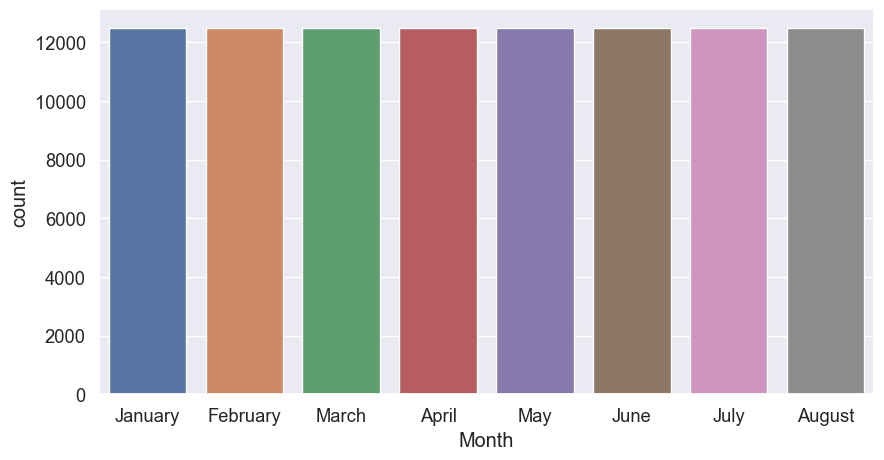

In [ ]:
sns.countplot(df['Month'])

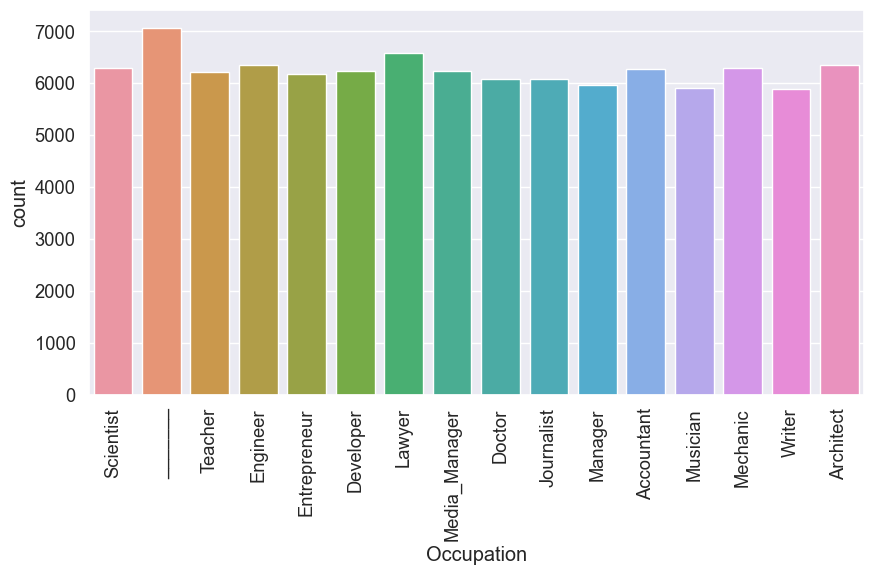

In [ ]:
sns.countplot(df['Occupation']);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

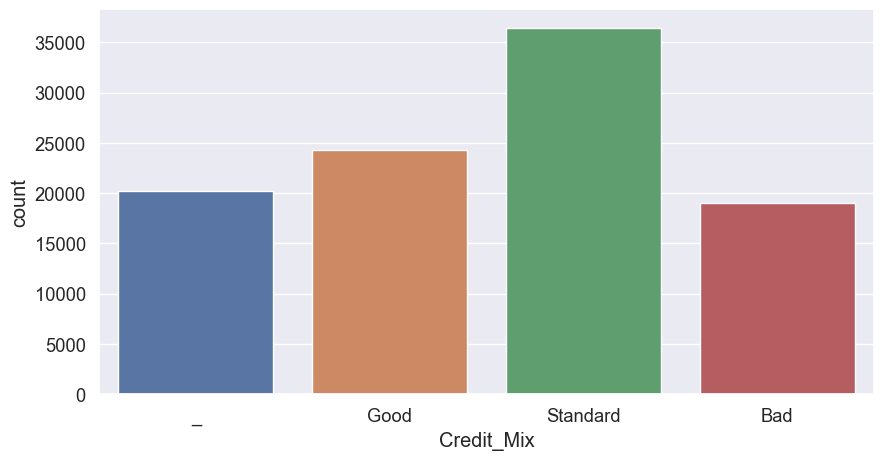

In [ ]:
sns.countplot(df['Credit_Mix'])

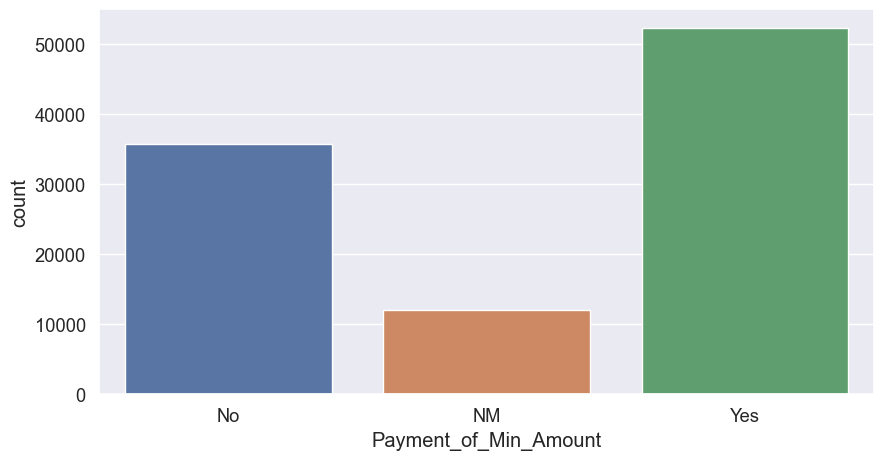

In [ ]:
sns.countplot(df['Payment_of_Min_Amount']);

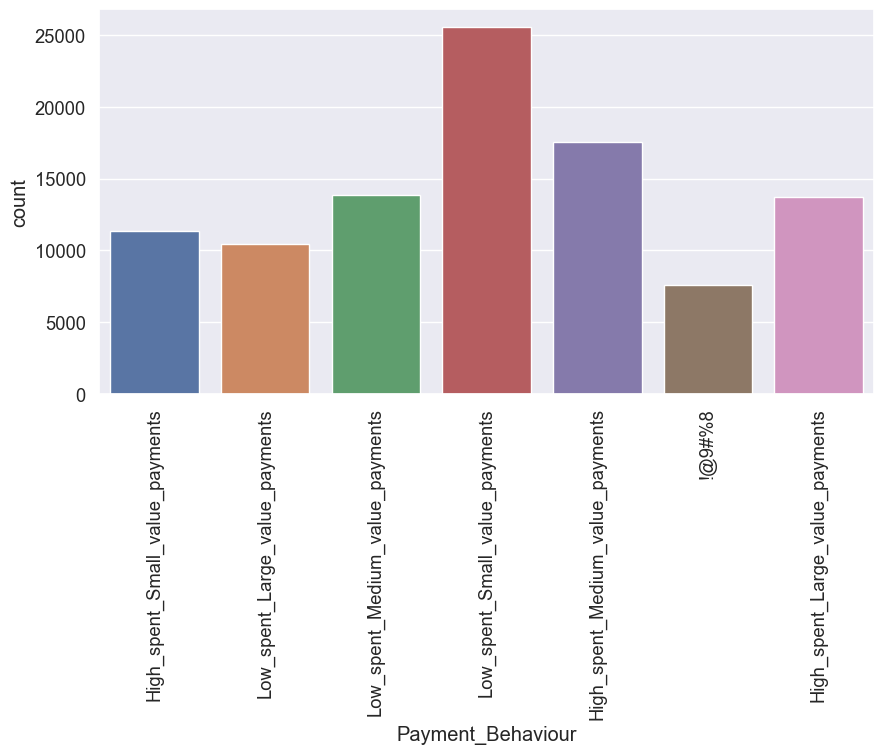

In [ ]:
sns.countplot(df['Payment_Behaviour']);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

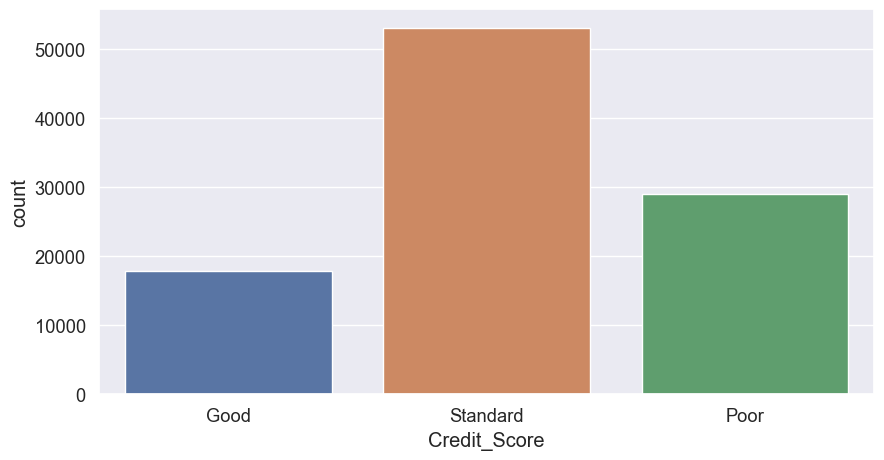

In [ ]:
# Plotting the target feature
sns.countplot(df['Credit_Score'])

In [ ]:
df['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

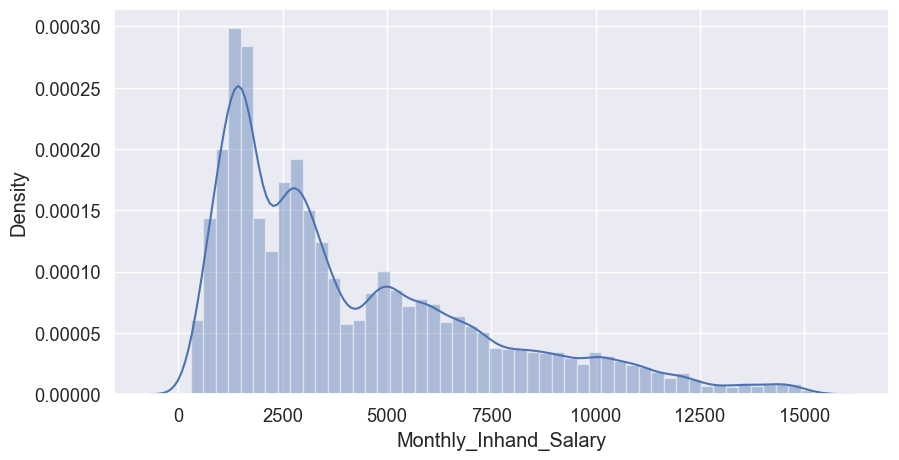

In [ ]:
sns.distplot(df['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Density'>

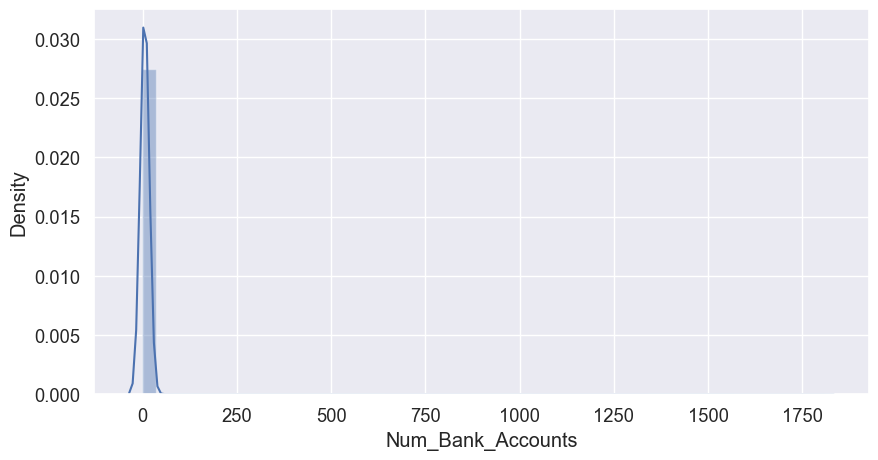

In [ ]:
sns.distplot(df['Num_Bank_Accounts'])

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Density'>

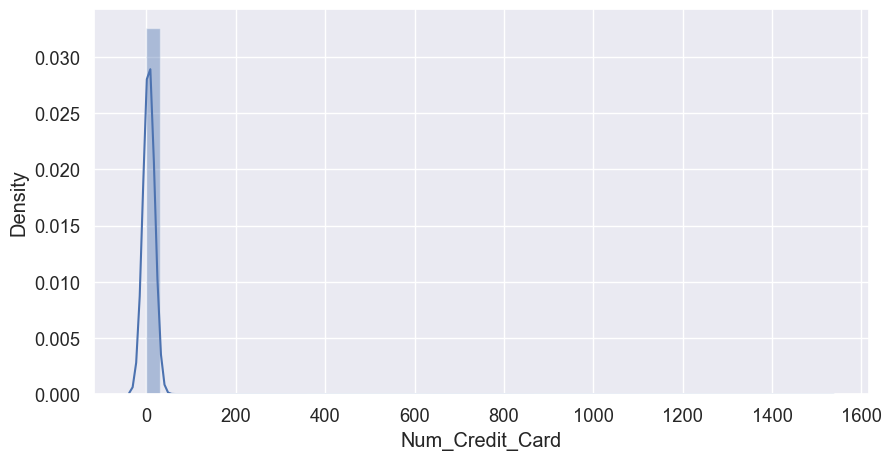

In [ ]:
sns.distplot(df['Num_Credit_Card'])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

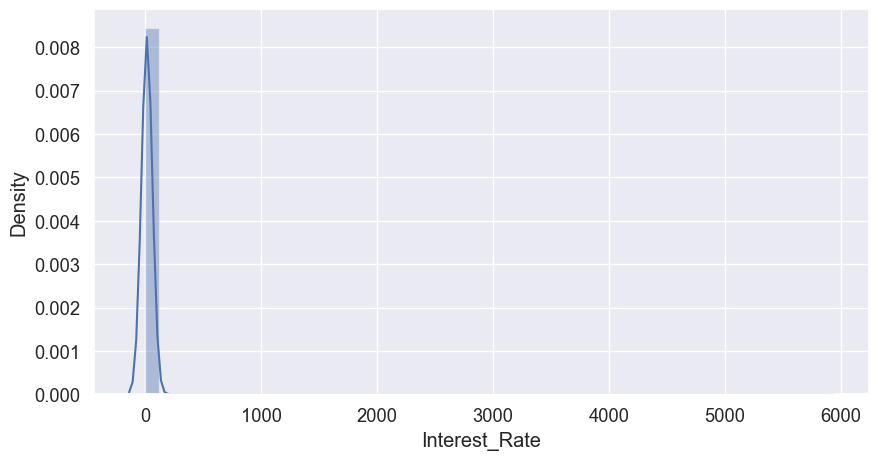

In [ ]:
sns.distplot(df['Interest_Rate'])

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

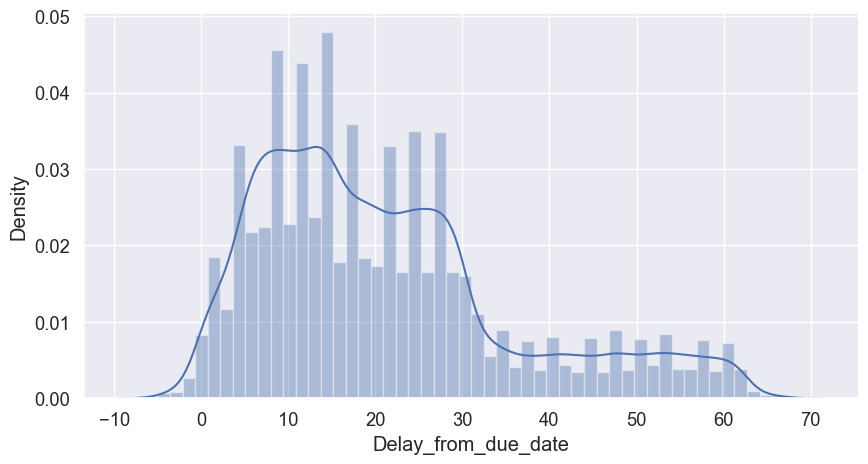

In [ ]:
sns.distplot(df['Delay_from_due_date'])

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='Density'>

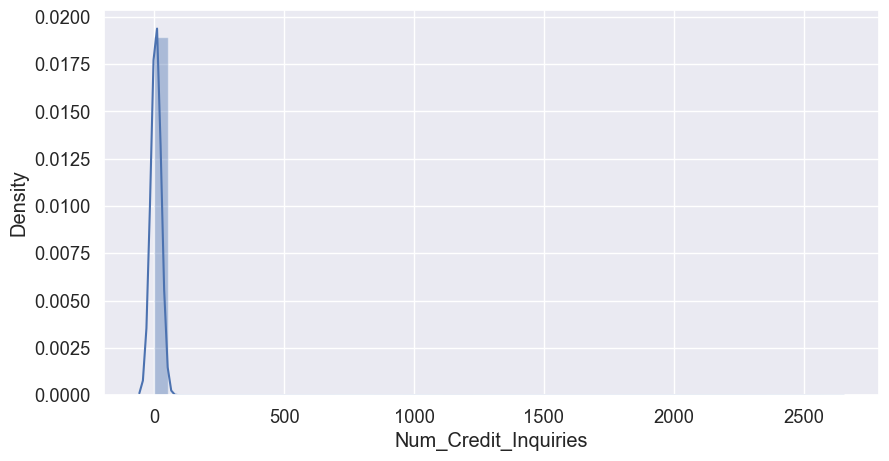

In [ ]:
sns.distplot(df['Num_Credit_Inquiries'])

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Density'>

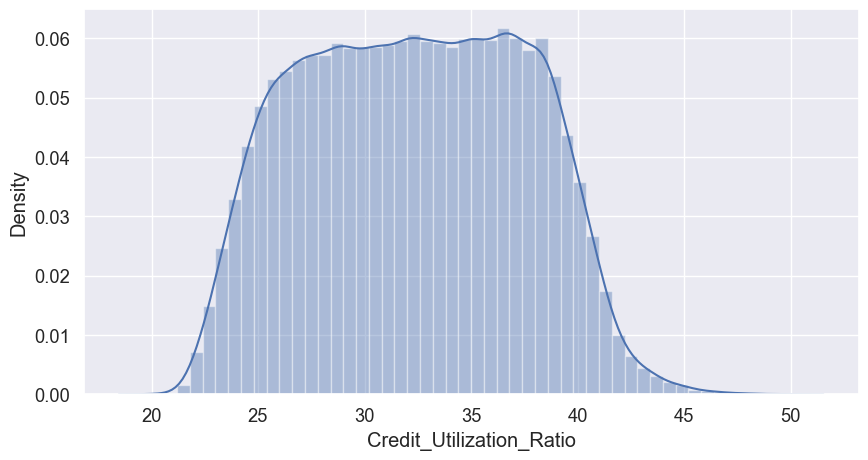

In [ ]:
sns.distplot(df['Credit_Utilization_Ratio'])

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

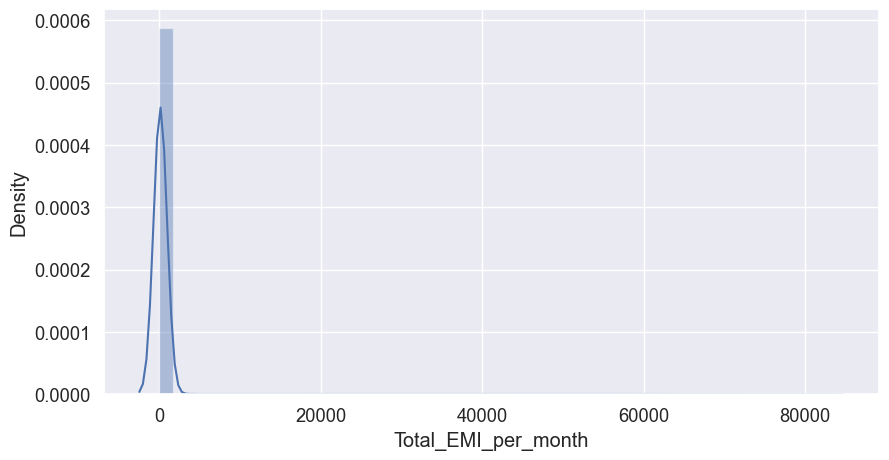

In [ ]:
sns.distplot(df['Total_EMI_per_month'])

In [ ]:
df['Type_of_Loan'].value_counts().head(10)

Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: Type_of_Loan, dtype: int64

<h3>Issues</h3>
<ol>
    <li>Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance are Numerical but showing as category</li>
    <li>Occupation, CreditMix has value "__"</li>
    <li>Data contains outliers</li>
    <li>Num_Credit_Card has zeros</li>
    <li>Type_of_Loan needs to be rewritten as 8 columns</li>
    <li>Num_Bank_Accounts contains negative values</li>
    <li>Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' need feature engineering</li>
    <li>Target column is imbalanced</li>
    <li>A lot of missing data</li>
</ol>

<h3>Data Cleaning</h3>

In [ ]:
# removing unuseful columns (uniques and name)

del df['ID']   # Identification
del df['Name'] # Name of client
del df['SSN']  # SSN (Social Security Number of a person)

<h4>Fixing Numerical Columns</h4>
<ol>
    <li>replace _</li>
    <li>convert into float</li>
</ol>

In [ ]:
need_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [ ]:
def fix_nums(num):
    try :
        return float(num.replace("_",""))
    except :
        return np.nan

In [ ]:
for col in need_to_fix :
    df[col] = df[col].apply(fix_nums)

<h4>Type_of_Loan</h4>

In [ ]:
# Rebuilding Type_of_loan Column

for i in df['Type_of_Loan'].value_counts().head(9).index[1:] :
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

<h4>Num_Bank_Accounts</h4>

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

<h4>Credit_History_Age</h4>

In [ ]:
def History_age(age):
    try :
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

<h4>Payment_of_Min_Amount</h4>

In [ ]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

<h4>Payment_Behaviour</h4>

In [ ]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8", np.nan)
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

<h4>Occupation</h4>

In [ ]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object')

In [ ]:
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
24,CUS_0xb891,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,433.604773,Standard,False,False,False,False,False,False,False,False
25,CUS_0xb891,February,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,409.951812,Standard,False,False,False,False,False,False,False,False
26,CUS_0xb891,March,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,411.427123,Standard,False,False,False,False,False,False,False,False
27,CUS_0xb891,April,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,262.499594,Standard,False,False,False,False,False,False,False,False
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,359.374916,Standard,False,False,False,False,False,False,False,False
29,CUS_0xb891,June,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,False,False,False,False,False,False,False,False
30,CUS_0xb891,July,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,443.549957,Standard,False,False,False,False,False,False,False,False
31,CUS_0xb891,August,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,...,379.216381,Standard,False,False,False,False,False,False,False,False


In [ ]:
# Takes lot of time to run

for ID in df[df['Occupation'] == "_______"]['Customer_ID'] :
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)

In [ ]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: Occupation, dtype: int64

In [ ]:
# Repalcing remaining _______ in Occupation with mode occupation

df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])
df['Occupation'].value_counts()

Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

<h4>Credit_Mix</h4>

In [ ]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

df['Credit_Mix'] = df['Credit_Mix'].map(m)

<h4>Advanced missing data handling</h4>

In [ ]:
# Editing Columns from bool to int

for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [ ]:
IDs = 1
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [ ]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [ ]:
# Takes lot of time to run (lot more than previous)

for col in Numericals[1:]:
    imputer.fit(df[['Customer_ID',col]])
    df[['Customer_ID',col]] = imputer.transform(df[['Customer_ID',col]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

<h4>Handling Outliers</h4>

In [ ]:
# replace Outliers with median

for col in Numericals :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

<h4>Handling Categorical Features</h4>

In [ ]:
df.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [ ]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [ ]:
# Dropping column Customer_ID

del df['Customer_ID']

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
# zero missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [ ]:
df.to_csv("credit_score_preprocessed_data.csv")